In [1]:
using Revise
using HydroSolver
using LinearAlgebra
using StaticArrays
using Statistics
using GLMakie,Makie
using IterativeSolvers
using Unitful
using ProfileView
using JLD2
using DifferentialEquations

Gtk-Message: 08:35:11.101: Failed to load module "canberra-gtk-module"


In [98]:
species = ["CH4","O2","N2","H2O","CO2"]
ρ = inrefunit(1.1614u"kg/m^3")
c_p = inrefunit(1200u"J/kg/K")
A = inrefunit(1.1e8u"s^-1/m^3*mol/1000")
T_A = inrefunit(1e4u"K")
W = inrefunit.([16,32,28,18,44].*1u"g/mol")
νk = [-1,-2,0,2,1]
enthalpy = inrefunit.([-74.9,0,0,-241.818,-393.52].*1u"kJ/mol");

In [100]:
function dYT(Y,T)
    Q = A*Y[1]*Y[2]^2*exp(-T_A/T)
    ωk = W.*νk.*Q
    ωt = -sum(enthalpy[k]/W[k]*ωk[k] for k in 1:5)
    return ωk/ρ,ωt/(ρ*c_p)
end

function dYT(YT)
    vcat(dYT(YT[1:5],YT[6])...)
end

dYT (generic function with 2 methods)

In [123]:
Y=[1,0.4,0.8,0,0]
T=600.0
YT=vcat(Y,T)
f(u,p,t) = dYT(u)
u0 = YT
tspan = (0.0,100)
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 100.0)
u0: 6-element Vector{Float64}:
   1.0
   0.4
   0.8
   0.0
   0.0
 600.0

In [124]:
A*1000

0.11

In [125]:
sol = solve(prob,AutoVern7(Rodas5()),reltol=1e-8,abstol=1e-8, dt=1e-8);

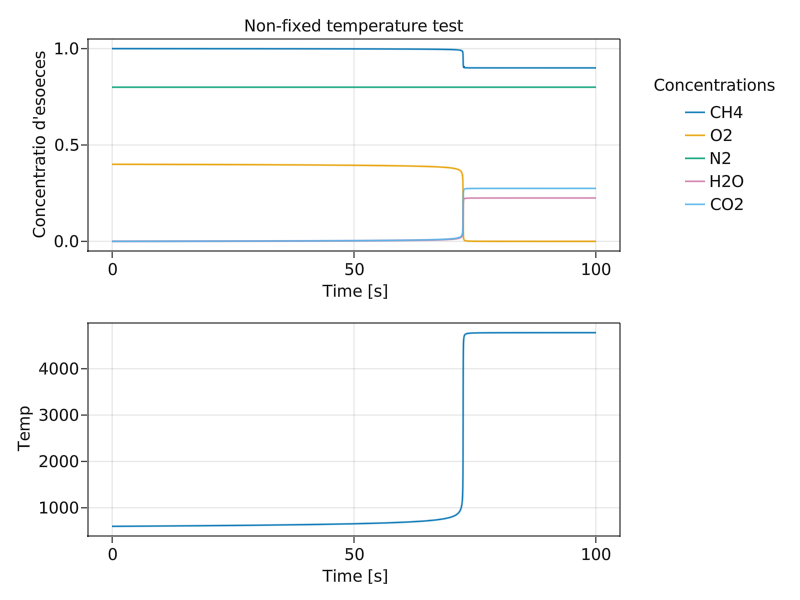

In [126]:
fig = Figure()

ax_C = Axis(fig[1, 1], xlabel = "Time [s]", ylabel = "Concentratio d'esoeces",title = "Non-fixed temperature test")
ax_T = Axis(fig[2, 1], xlabel = "Time [s]", ylabel = "Temp")

for k in 1:5
    lines!(ax_C,sol.t,[i[k] for i in sol.u],label=species[k])
end
lines!(ax_T,sol.t,[i[6] for i in sol.u])
fig[1, 2] = Legend(fig, ax, "Concentrations", framevisible = false)
save("autoign.png",fig)
fig

In [116]:
sol.u

91-element Vector{Vector{Float64}}:
 [1.0, 0.4, 0.8, 0.0, 0.0, 700.0]
 [0.9999999999984849, 0.3999999999939396, 0.8, 3.408995773799257e-12, 4.1665503901990924e-12, 700.0000000633075]
 [0.9999999999833338, 0.39999999993333524, 0.8, 3.7498953748067866e-11, 4.5832054580971836e-11, 700.0000006963833]
 [0.9999999998318229, 0.3999999993272915, 0.8, 3.7839855711835995e-10, 4.6248712536688447e-10, 700.0000070271415]
 [0.9999999983167125, 0.39999999326684993, 0.8, 3.787396953583992e-9, 4.629040721047101e-9, 700.0000703347669]
 [0.9999999831655035, 0.39999993266201395, 0.8, 3.787761719655149e-8, 4.629486546245181e-8, 700.0007034154088]
 [0.9999998316429114, 0.3999993265716454, 0.8, 3.7880344949846e-7, 4.6298199383145105e-7, 700.0070346606523]
 [0.9999983153658655, 0.39999326146346176, 0.8, 3.790426802786544e-6, 4.632743870072442e-6, 700.0703910334512]
 [0.9999856605734898, 0.39994264229395915, 0.8, 3.226370964801026e-5, 3.943342290312366e-5, 700.5991609872076]
 [0.9999007837283947, 0.39960313491